<a href="https://colab.research.google.com/github/sj0320/DAP_/blob/main/%5BDAP_2022%5D_Finalterm_Lab_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Term Examination - Lab Session
### Data Analysis Programming - 4471017
##### Kangwon National University
##### 28. Oct. 2022.
---
| Problem | Score |
|---------|-------|
| 1       |(&emsp;&emsp;) / 10    |
| 2       |(&emsp;&emsp;) / 10    |
| 2       |(&emsp;&emsp;) / 30    |
| Total   |(&emsp;&emsp;) / 50    |

---
* This examination contains **two problems**.

* You have **40 minutes** to complete the examination.
       
* Please download `.ipynb` file and submit it on ERUI.

* No need to consider colors.
---

# Load Packages

In [16]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
pp = pprint.PrettyPrinter(indent=4)

# Problem. Classification

동물 얼굴 사진을 이용하여 동물종을 분류하는 모델을 구축하려 한다.

## Load Dataset
데이터 로드와 관련된 부분.
본 부분은 따로 수정하실 필요 없습니다.

In [17]:
!wget https://vcla.stat.ucla.edu/people/zhangzhang-si/HiT/AnimalFace.zip

--2022-12-16 06:56:45--  https://vcla.stat.ucla.edu/people/zhangzhang-si/HiT/AnimalFace.zip
Resolving vcla.stat.ucla.edu (vcla.stat.ucla.edu)... 128.199.9.172
Connecting to vcla.stat.ucla.edu (vcla.stat.ucla.edu)|128.199.9.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37324985 (36M) [application/zip]
Saving to: ‘AnimalFace.zip.1’

AnimalFace.zip.1    100%[===================>]  35.60M  12.5MB/s    in 2.8s    

2022-12-16 06:56:49 (12.5 MB/s) - ‘AnimalFace.zip.1’ saved [37324985/37324985]



In [18]:
!unzip AnimalFace.zip

Archive:  AnimalFace.zip
replace Image/DuckHead/duckside0053.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [19]:
import joblib
from skimage.io import imread
from skimage.transform import resize
 
def resize_all(src, pklname, include, width=150, height=None):
    """
    load images from path, resize them and write them as arrays to a dictionary, 
    together with labels and metadata. The dictionary is written to a pickle file 
    named '{pklname}_{width}x{height}px.pkl'.
     
    Parameter
    ---------
    src: str
        path to data
    pklname: str
        path to output file
    width: int
        target width of the image in pixels
    include: set[str]
        set containing str
    """
     
    height = height if height is not None else width
     
    data = dict()
    data['description'] = 'resized ({0}x{1})animal images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []   
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
 
    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)
 
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    im = imread(os.path.join(current_path, file))
                    im = resize(im, (width, height)) #[:,:,::-1]
                    data['label'].append(subdir[:-4])
                    data['filename'].append(file)
                    data['data'].append(im)
 
        joblib.dump(data, pklname)

In [20]:
# modify to fit your system
data_path = fr'Image'
os.listdir(data_path)

['DeerHead',
 'DogHead',
 'TigerHead',
 'MonkeyHead',
 'MouseHead',
 'BearHead',
 'LionHead',
 'WolfHead',
 'RabbitHead',
 'ChickenHead',
 'PigeonHead',
 'CatHead',
 'EagleHead',
 'ElephantHead',
 'PandaHead',
 'HumanHead',
 'PigHead',
 'Natural',
 'CowHead',
 'SheepHead',
 'DuckHead']

In [21]:
base_name = 'animal_faces'
width = 80
 
include = {'ChickenHead', 'BearHead', 'ElephantHead', 
           'EagleHead', 'DeerHead', 'MonkeyHead', 'PandaHead'}
 
resize_all(src=data_path, pklname=base_name, width=width, include=include)

DeerHead
MonkeyHead
BearHead
ChickenHead
EagleHead
ElephantHead
PandaHead


In [22]:
from collections import Counter
 
data = joblib.load(f'{base_name}_{width}x{width}px.pkl')
 
print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

number of samples:  716
keys:  ['description', 'label', 'filename', 'data']
description:  resized (80x80)animal images in rgb
image shape:  (80, 80, 3)
labels: ['Bear' 'Chicken' 'Deer' 'Eagle' 'Elephant' 'Monkey' 'Panda']


Counter({'Deer': 101,
         'Monkey': 100,
         'Bear': 101,
         'Chicken': 100,
         'Eagle': 97,
         'Elephant': 100,
         'Panda': 117})

In [23]:
X = np.array(data['data'])
y = np.array(data['label'])

## 1. Data split [10 pts]
위에서 정의된 데이터를 이용하여 train set과 test set으로 분리하시오.
두 set의 비율은 8:2로 지정하고, random_state의 seed는 42로 지정하시오.

In [24]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.20, random_state=42
)

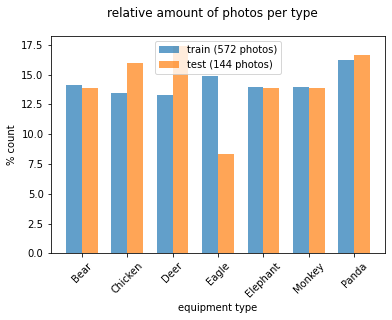

In [25]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
 
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);

## Feature Extraction
이미지에 대해 feature를 뽑고자 한다.
뽑으려는 feature는 HoG (Histogram of Gradient)이다. 
HoG feature는 OpenCV에서 `hog` 라는 이름의 method를 제공한다. 

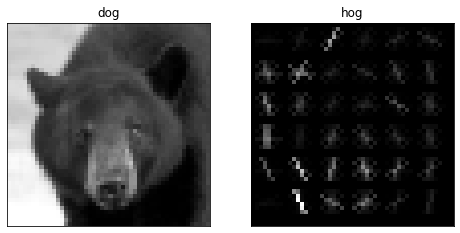

In [26]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
 
dog = imread('/content/Image/BearHead/bearfrontal0001.jpg', as_gray=True)
 
# scale down the image to one third
dog = rescale(dog, 1/3, mode='reflect')

# calculate the hog and return a visual representation.
dog_hog, dog_hog_img = hog(dog, visualize=True)
 
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)
# remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 
    for a in ax]
 
ax[0].imshow(dog, cmap='gray')
ax[0].set_title('dog')
ax[1].imshow(dog_hog_img, cmap='gray')
ax[1].set_title('hog')
plt.show()

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin
 
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X])
     
 
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self):
      pass
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None): 
        def local_hog(X):
            return hog(X)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

In [28]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage
 
# create an instance of each transformer
grayify = RGB2GrayTransformer()
hogify = HogTransformer()
scalify = StandardScaler()
 
# call fit_transform on each transform converting X_train step by step
X_train_gray = grayify.fit_transform(X_train)
X_train_hog = hogify.fit_transform(X_train_gray)
X_train_prepared = scalify.fit_transform(X_train_hog)
 
print(X_train_prepared.shape)

(572, 5184)


## 2. PCA [10pts]
추출한 HoG feature는 5,184 차원을 갖고 있어 주어진 데이터에 비해 너무 큰 차원이다. PCA를 이용하여 차원을 줄이고자 한다. PCA를 이용하여 차원으로 축소하시오. **차원의 개수는 자유롭게 선택하시되 구현할 모델의 성능이 최대가 될 수 있도록 고르는 것을 추천합니다.**

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)

X_train_pca = pca.fit_transform(X_train_prepared)

## 3. Classification [30pts]
수업 시간에 다룬 다양한 classifier (SVM, kNN, LR, deicision tree 등)중 하나를 사용하여 모델을 학습하라.

정확도 기준,
- 90 % 성능 이상은 30점
- 85 ~ 89.9 %은 20점
- 80 ~ 85 %이하는 10점
- 80 %이하는 5점
- 미완성 및 에러 발생 시 0점

In [47]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train_pca, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Evaluation

Test set에 대해 분류하고 평가하기

In [48]:
X_test_gray = grayify.transform(X_test)
X_test_hog = hogify.transform(X_test_gray)
X_test_prepared = scalify.transform(X_test_hog)
X_test_pca = pca.transform(X_test_prepared)

In [49]:
y_pred = model.predict(X_test_pca)
print(np.array(y_pred == y_test)[:25])
print('')
print('Percentage correct: ', 100*np.sum(y_pred == y_test)/len(y_test))

[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False]

Percentage correct:  93.05555555555556


              precision    recall  f1-score   support

        Bear       0.86      0.90      0.88        20
     Chicken       0.96      0.96      0.96        23
        Deer       1.00      1.00      1.00        25
       Eagle       0.86      1.00      0.92        12
    Elephant       1.00      0.95      0.97        20
      Monkey       0.88      0.70      0.78        20
       Panda       0.92      1.00      0.96        24

    accuracy                           0.93       144
   macro avg       0.92      0.93      0.92       144
weighted avg       0.93      0.93      0.93       144



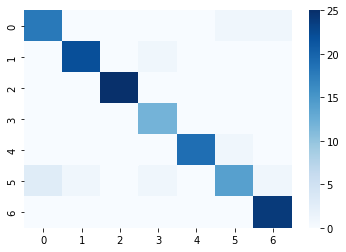

In [50]:
import pandas
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
 
labels = np.unique(y_test)
cmx = confusion_matrix(y_test, y_pred, labels=labels)
sns.heatmap(cmx, fmt='', cmap='Blues')

print(classification_report(y_test, y_pred))